<a href="https://colab.research.google.com/github/Irkutsk-Karas/ML_diabetes_analysis/blob/main/zdrav4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.7835497835497836


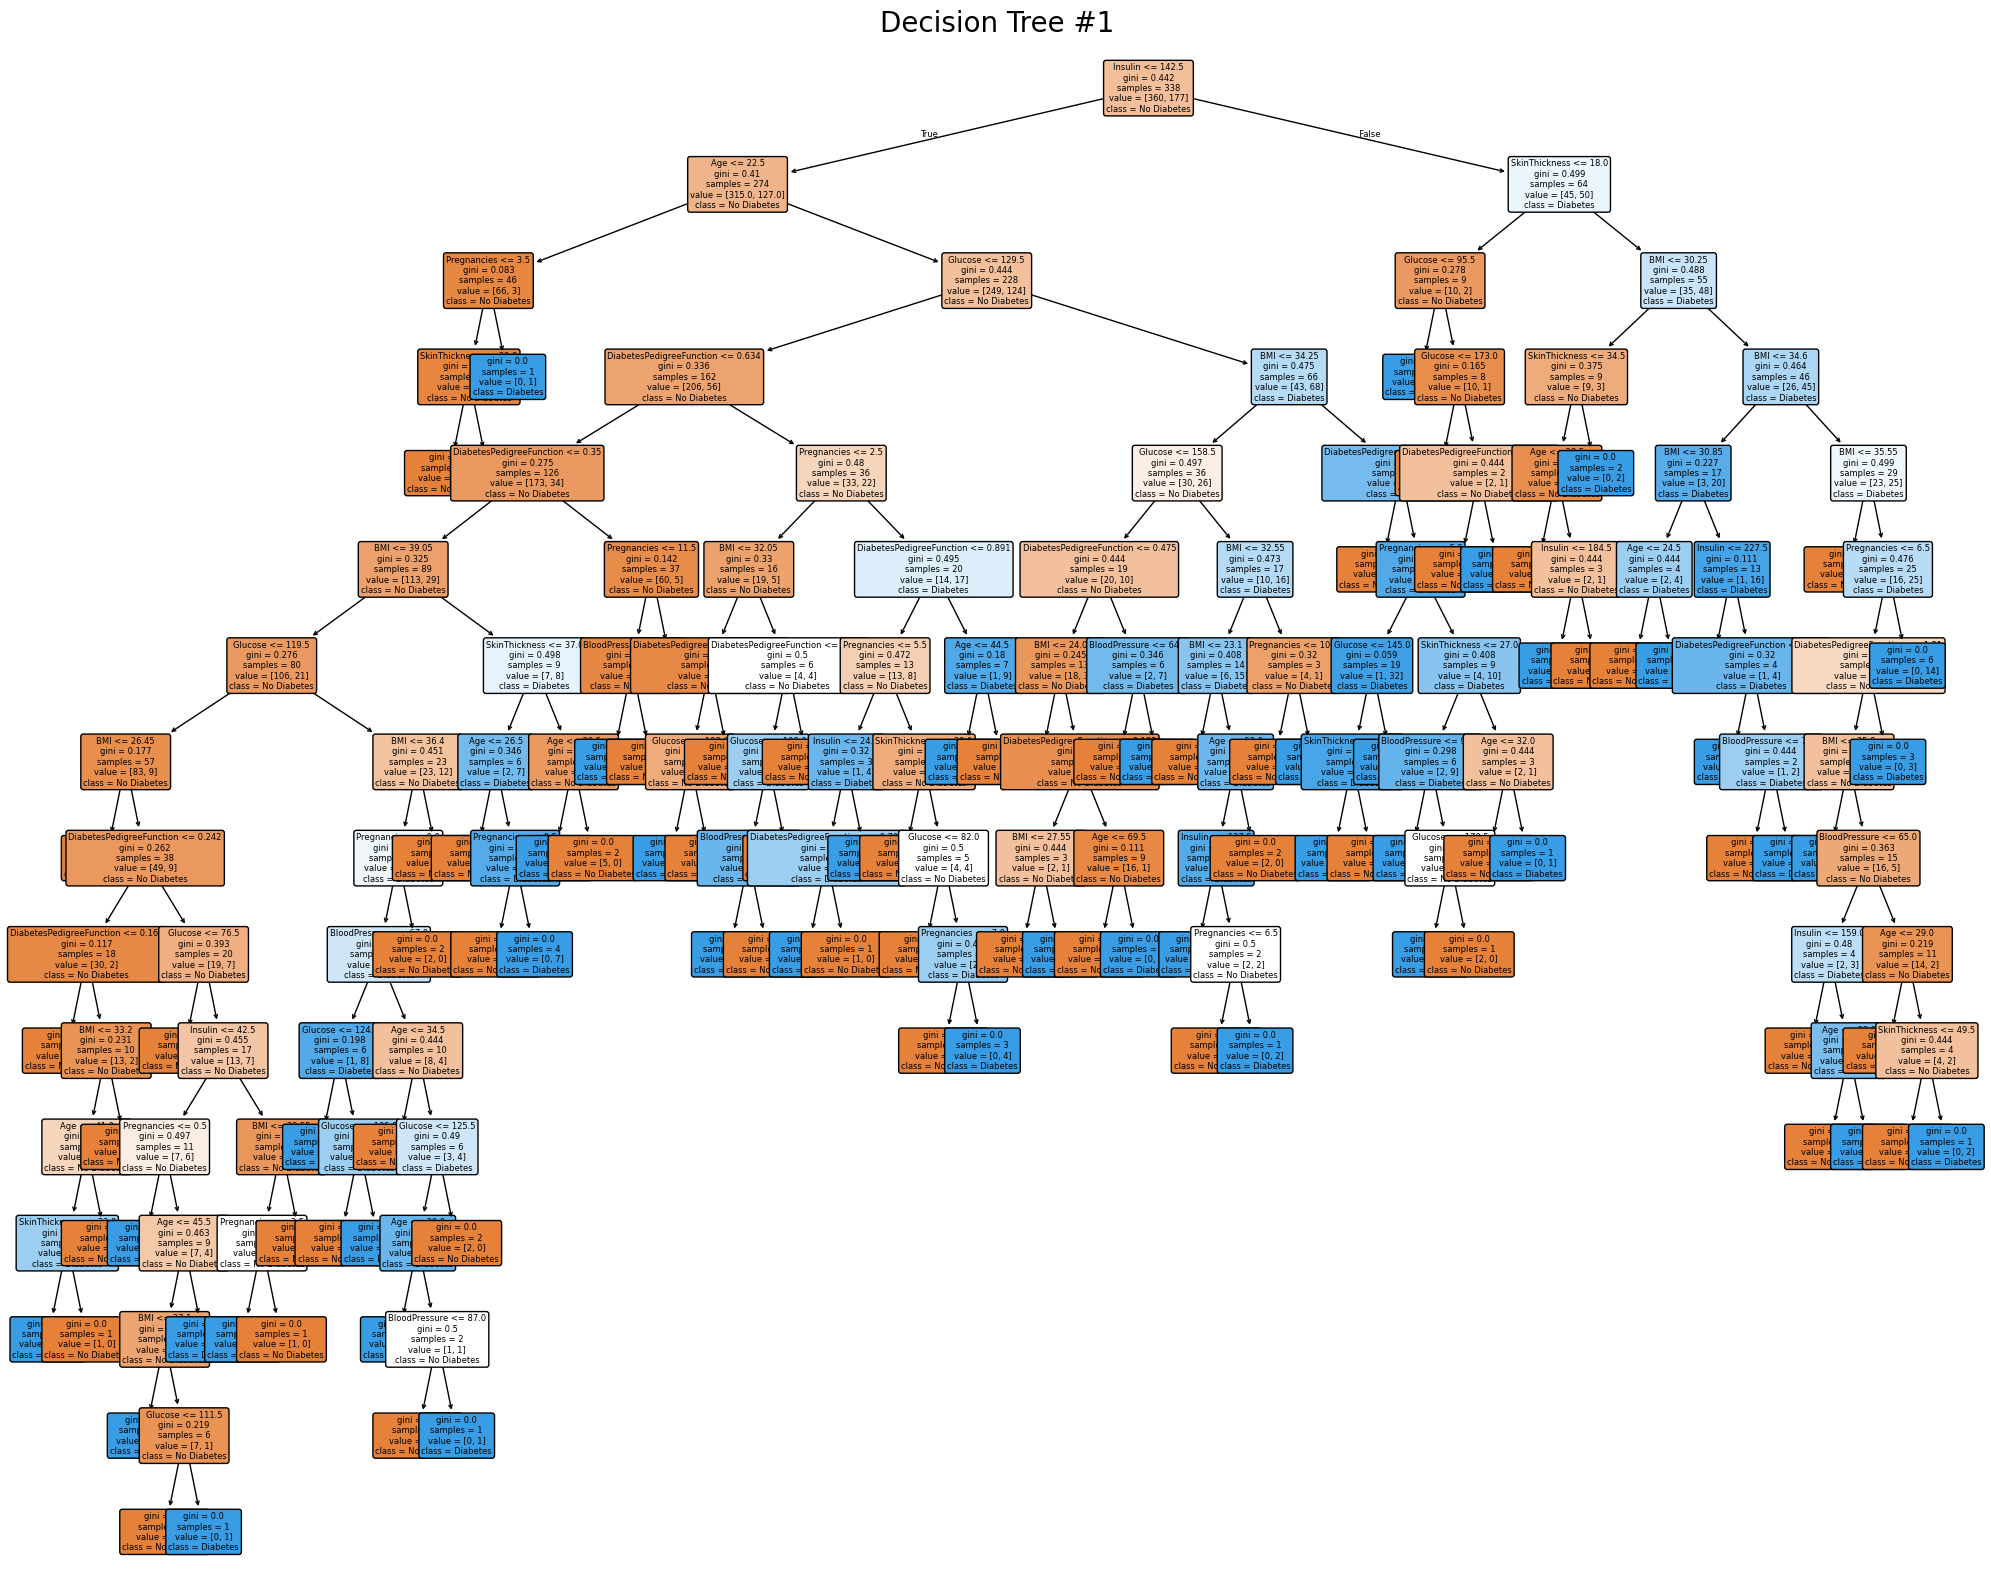

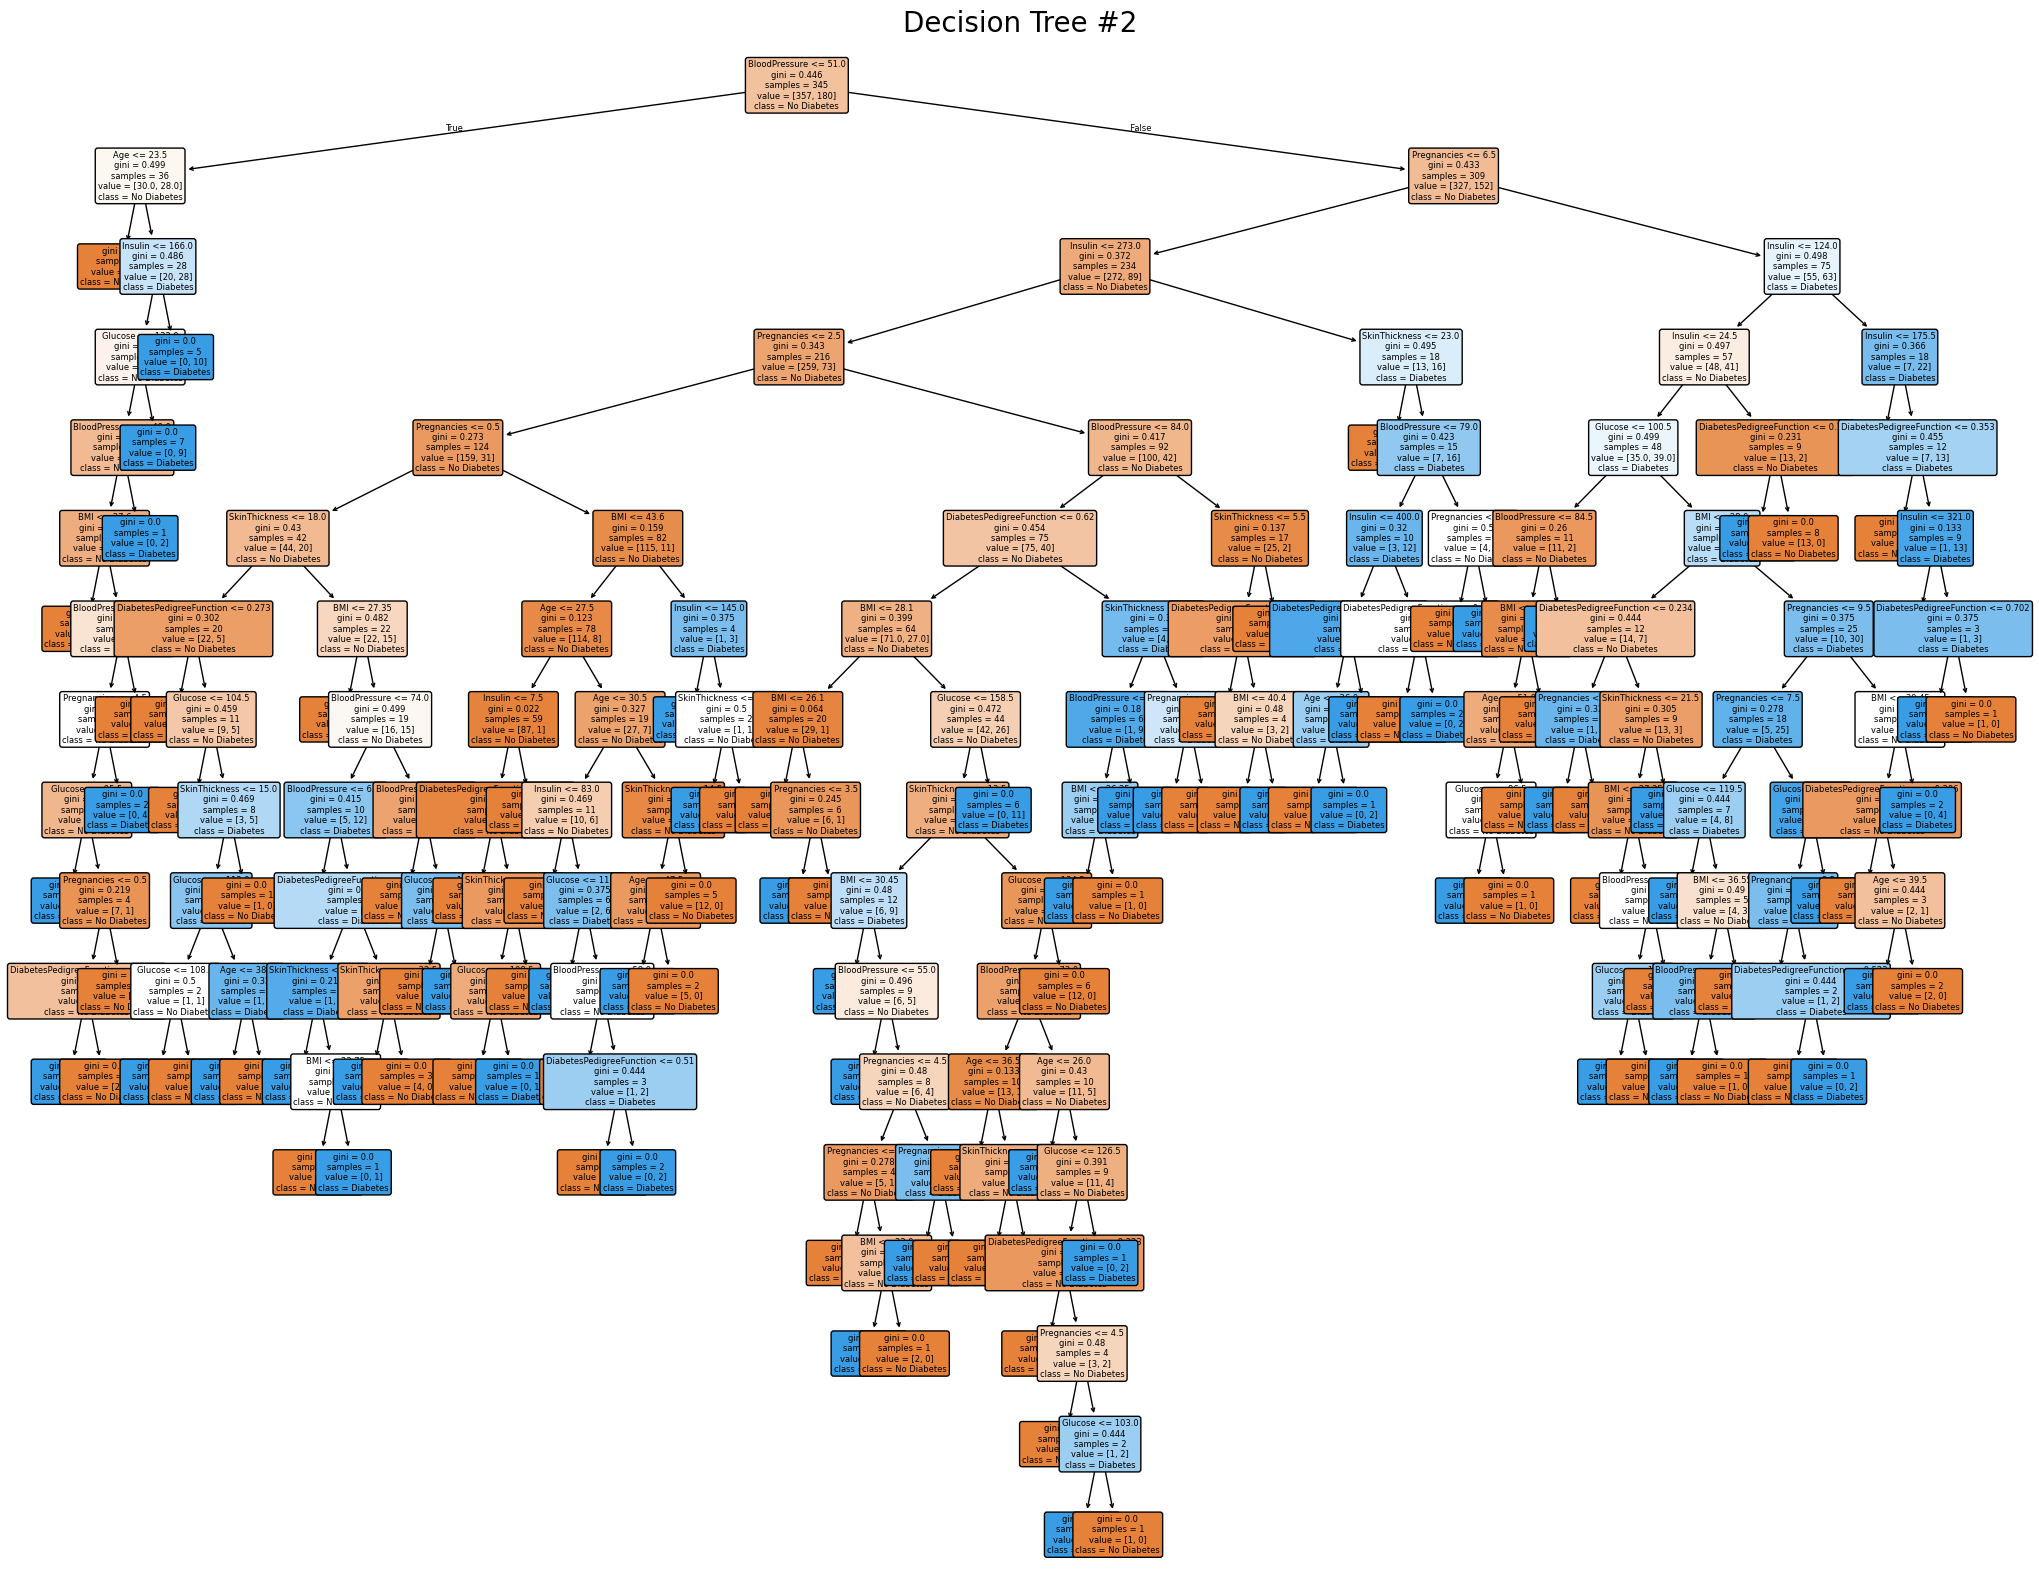

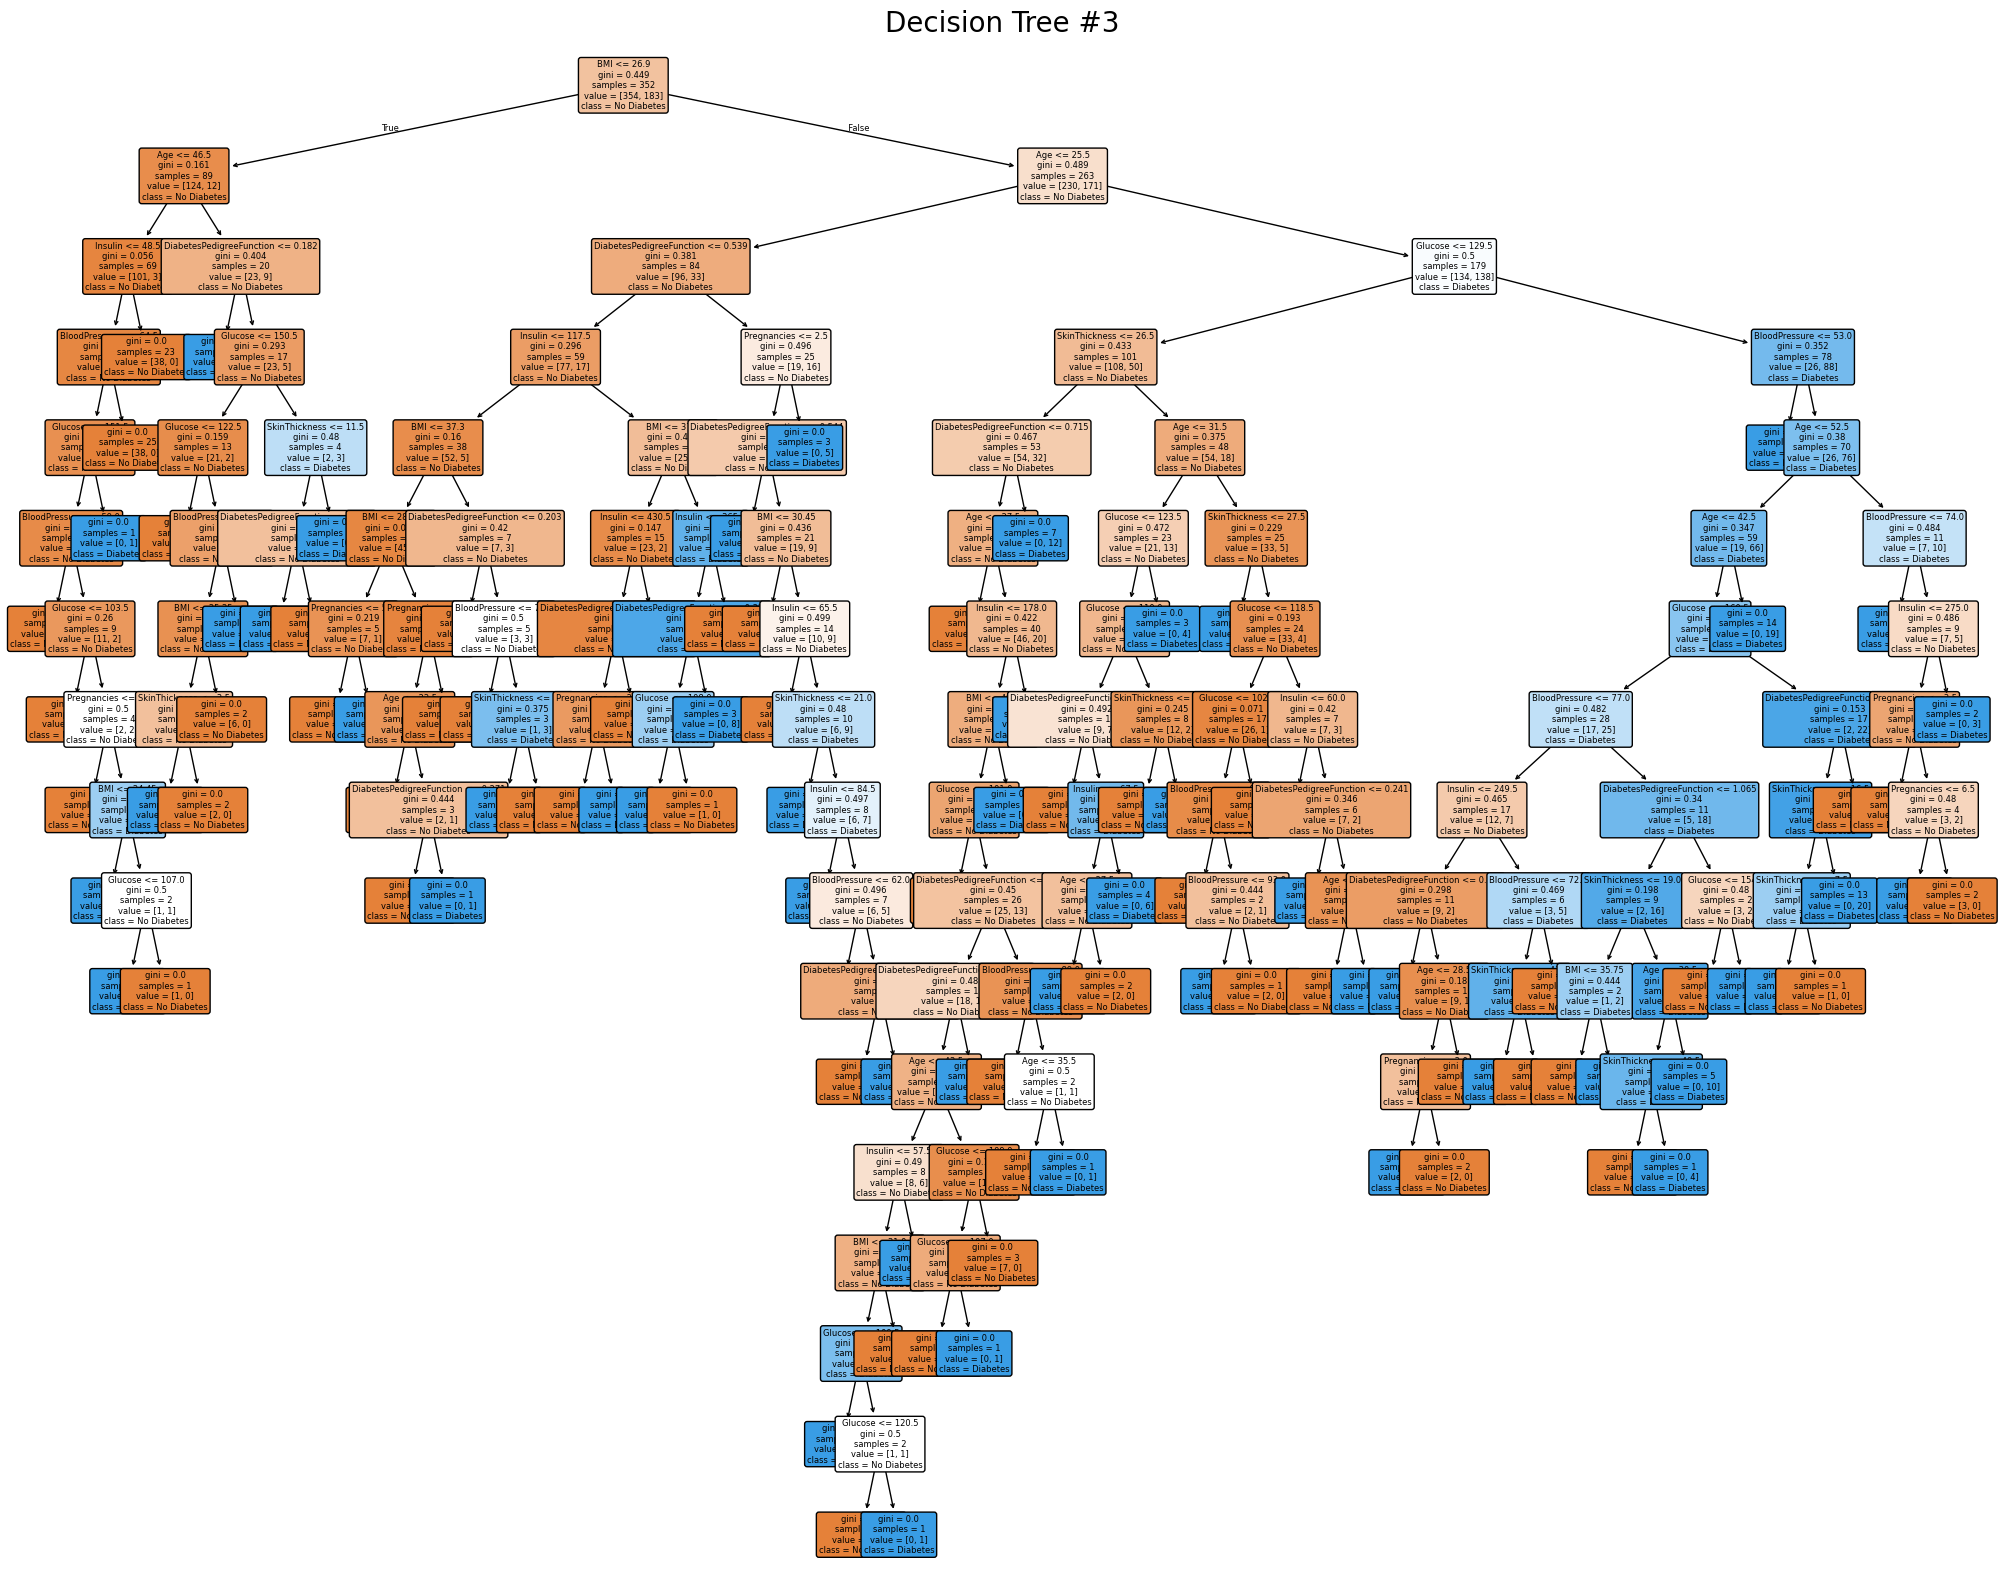

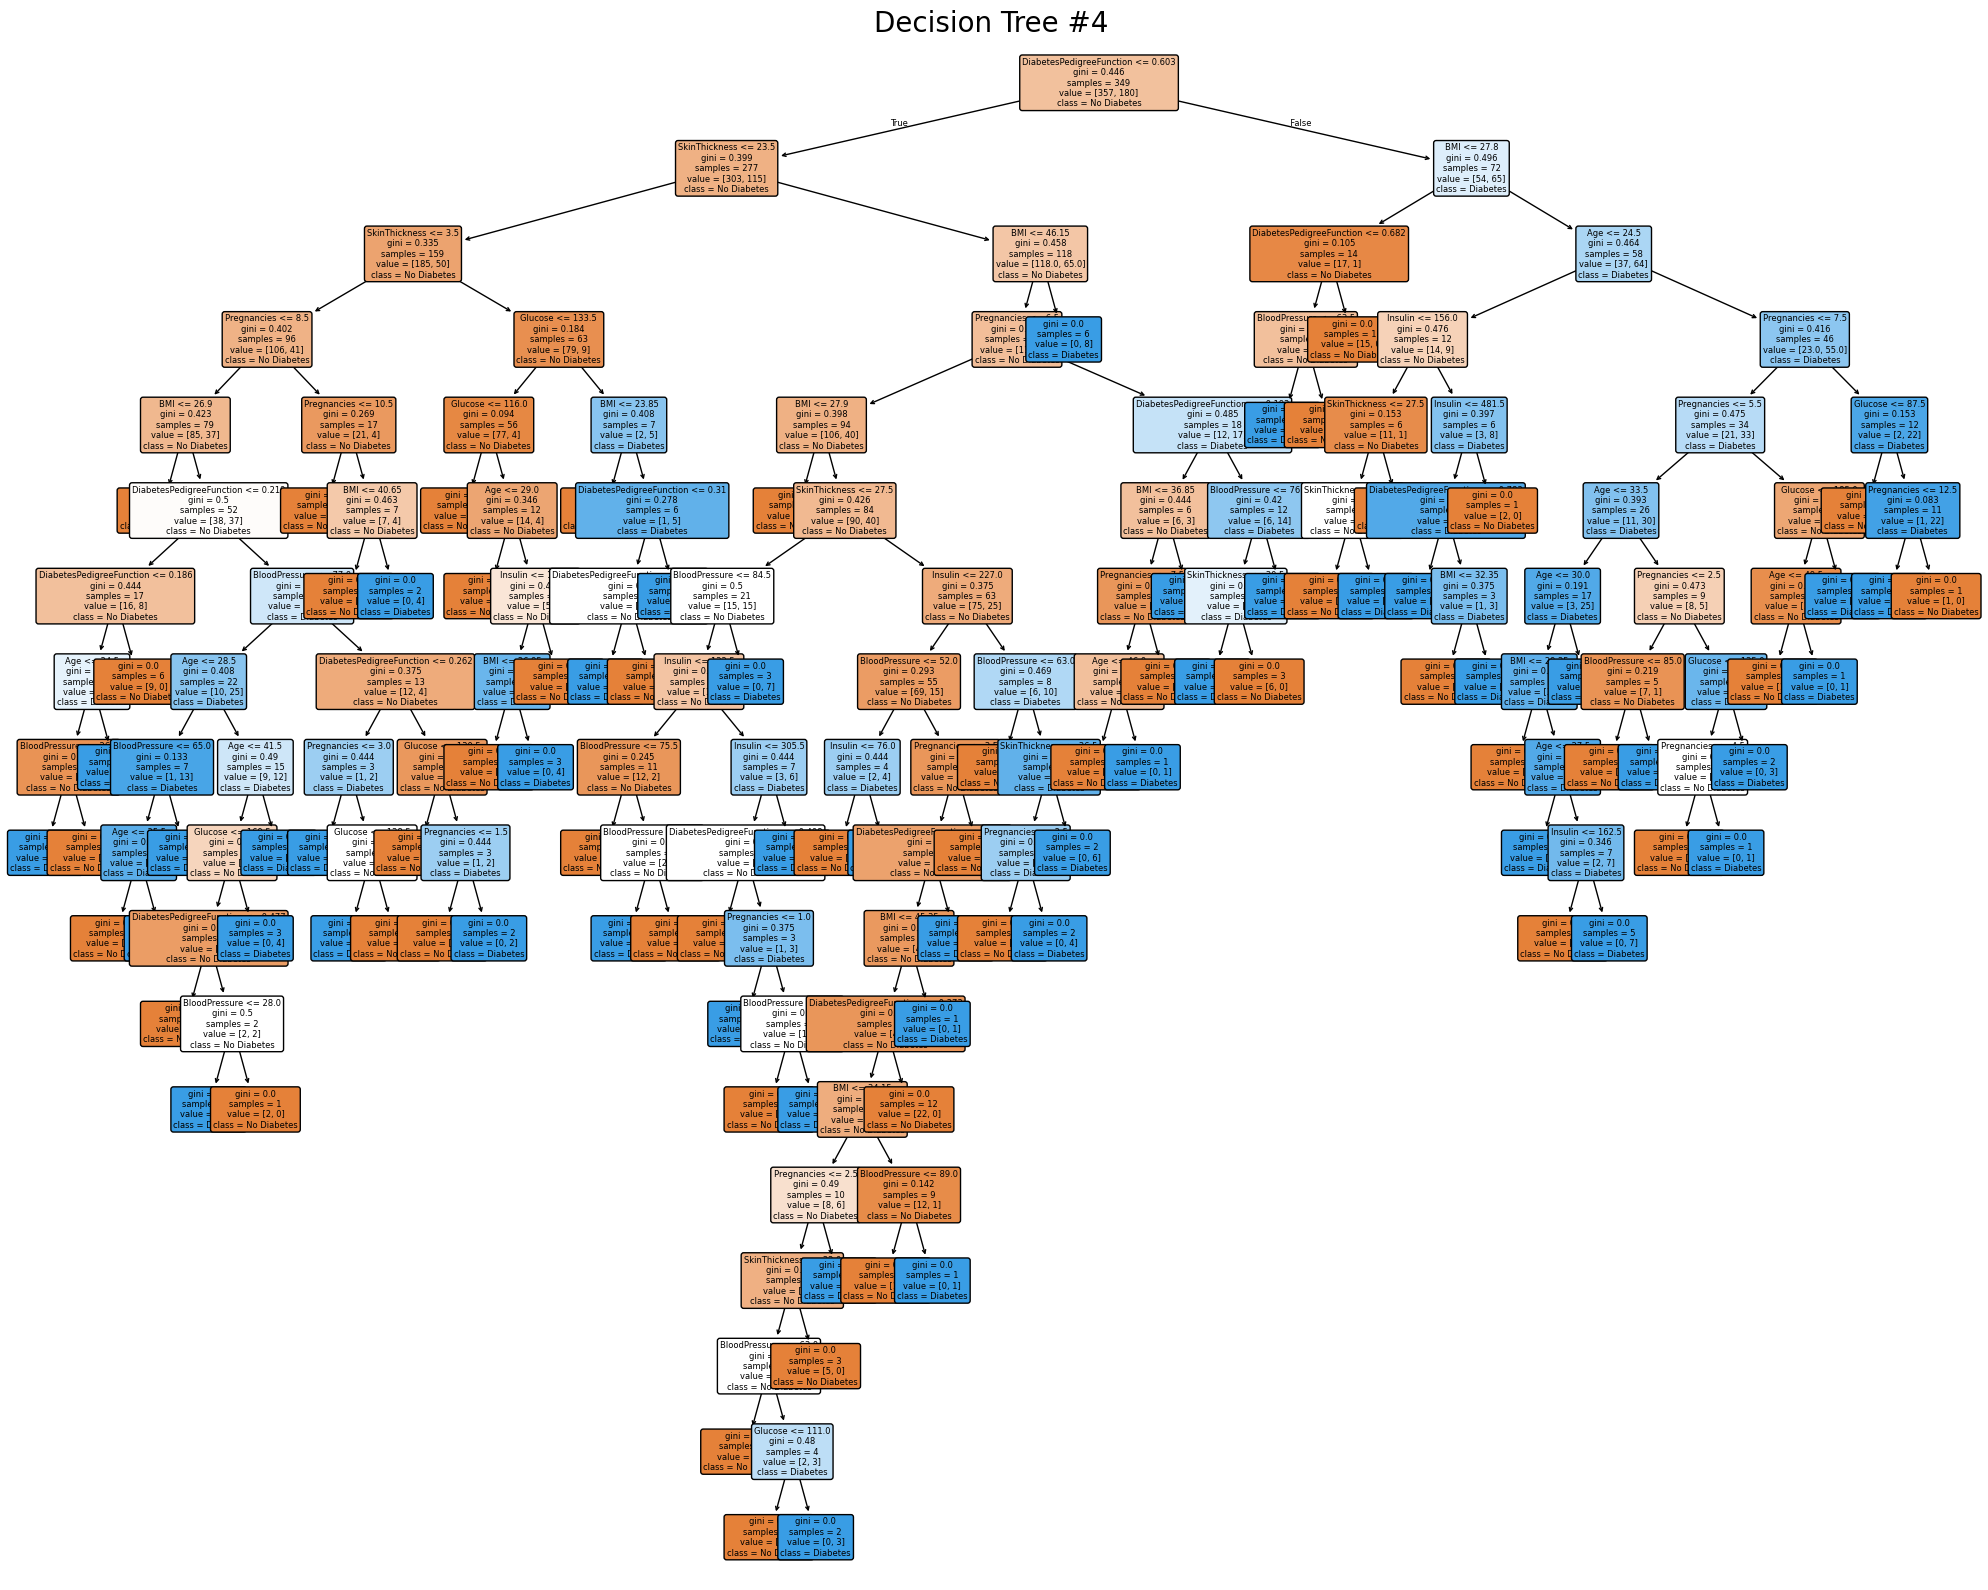

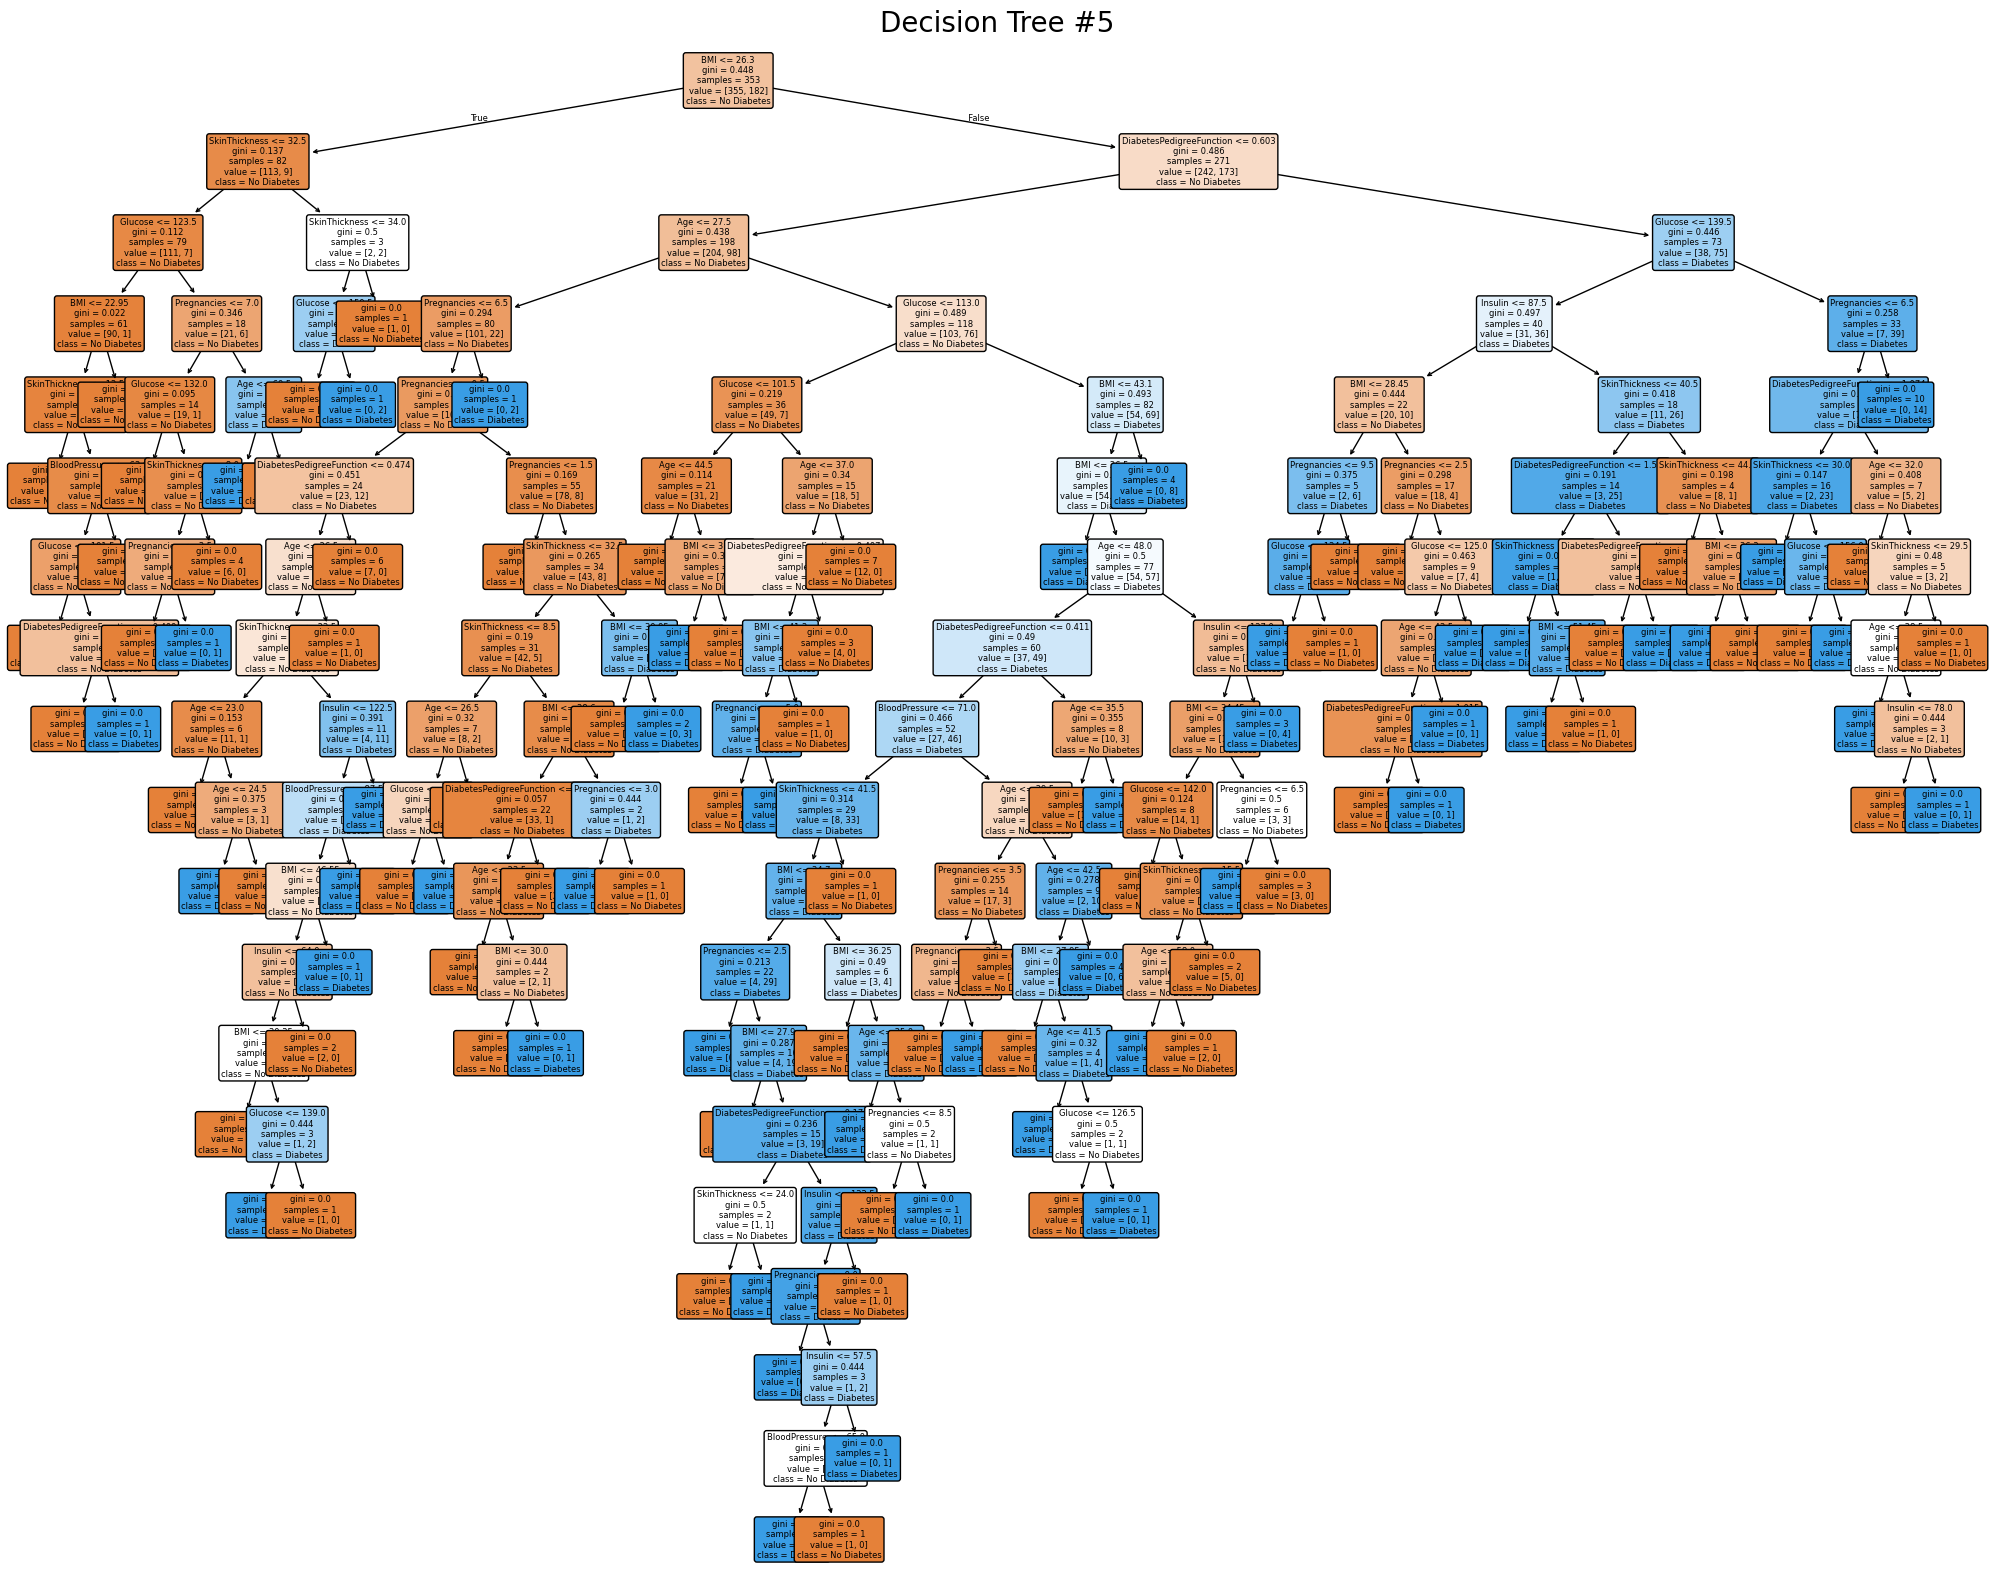

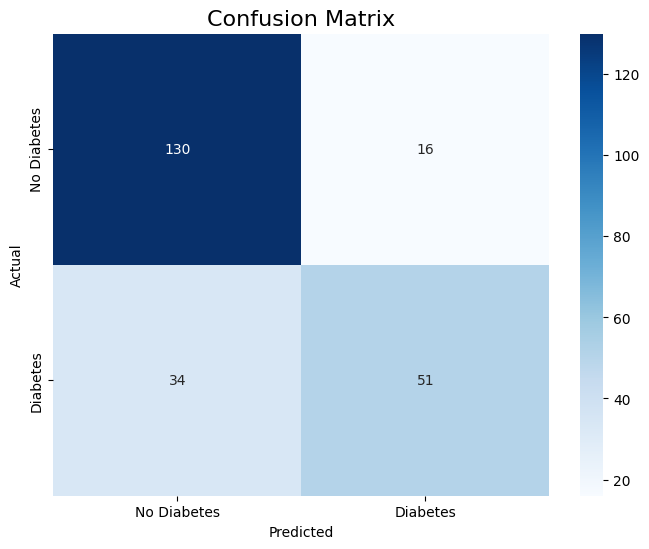

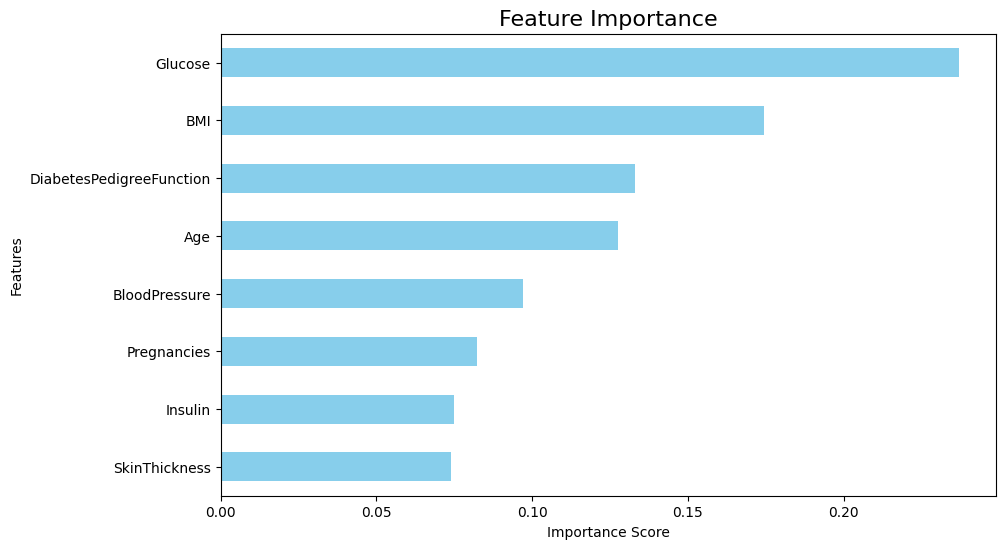

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Загрузка данных
df = pd.read_csv("diabetes.csv")
y = df.Outcome.values
X = df.drop(['Outcome'], axis=1)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Обучение модели
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Оценка точности
result = accuracy_score(y_test, y_pred)
print("Accuracy:", result)

# Визуализация деревьев
for index in range(0, 5):
    fig = plt.figure(figsize=(25, 20))
    plot_tree(clf.estimators_[index],
              filled=True,
              rounded=True,
              feature_names=X.columns,
              class_names=['No Diabetes', 'Diabetes'],
              fontsize=6)
    plt.title(f"Decision Tree #{index+1}", fontsize=20)
    plt.show()

# Матрица ошибок
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Важность признаков
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(8).sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1